# Imports

In [16]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [17]:
n = 6 # 5~9
label_name = "stat6" # update stat number
layers = [18, 10, 2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 8000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.001 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [18]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [19]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 6.335123836994171
Epoch 1, Loss 6.328330159187317
Epoch 2, Loss 6.3178990483284
Epoch 3, Loss 6.307724833488464
Epoch 4, Loss 6.298634350299835
Epoch 5, Loss 6.292004823684692
Epoch 6, Loss 6.282318532466888
Epoch 7, Loss 6.2763970494270325
Epoch 8, Loss 6.271242558956146
Epoch 9, Loss 6.266390681266785
Epoch 10, Loss 6.261851906776428
Epoch 11, Loss 6.258308470249176
Epoch 12, Loss 6.254989445209503
Epoch 13, Loss 6.251678049564362
Epoch 14, Loss 6.249172866344452
Epoch 15, Loss 6.247867584228516
Epoch 16, Loss 6.244924426078796
Epoch 17, Loss 6.243524730205536
Epoch 18, Loss 6.241741240024567
Epoch 19, Loss 6.240657448768616
Epoch 20, Loss 6.23946887254715
Epoch 21, Loss 6.23812597990036
Epoch 22, Loss 6.237448215484619
Epoch 23, Loss 6.2364219427108765
Epoch 24, Loss 6.23567795753479
Epoch 25, Loss 6.235183775424957
Epoch 26, Loss 6.234599590301514
Epoch 27, Loss 6.2341285943984985
Epoch 28, Loss 6.233527719974518
Epoch 29, Loss 6.23314493894577
Epoch 30, Loss 6.232698

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_5256\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


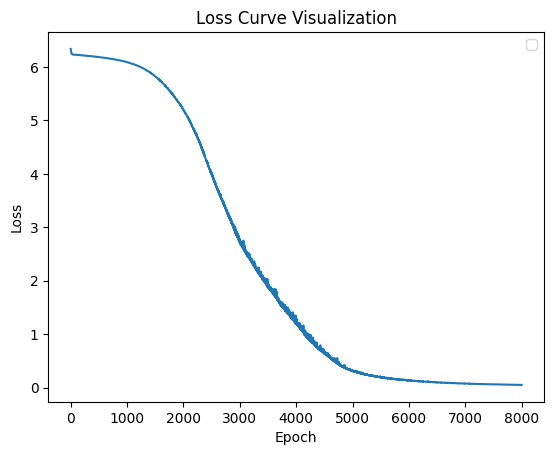

In [20]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[289, 0], [0, 287]]


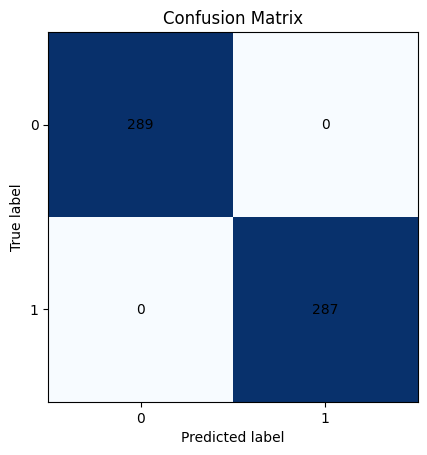

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [25]:
confusion_matrix = evaluate_model(model, training_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

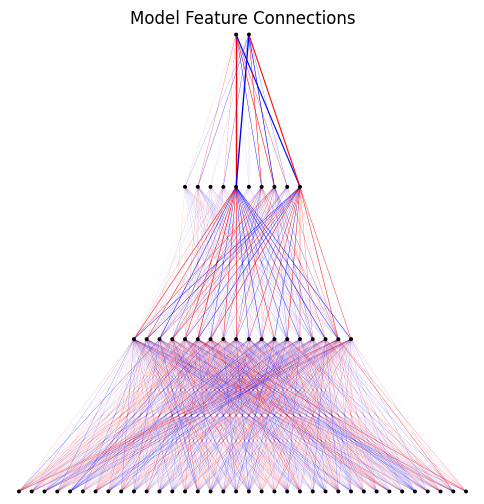

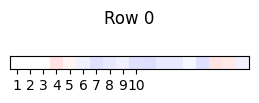

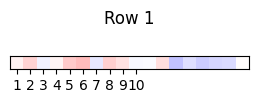

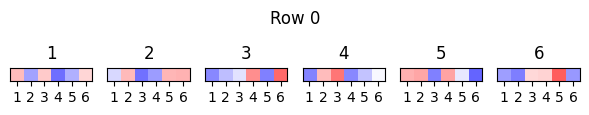

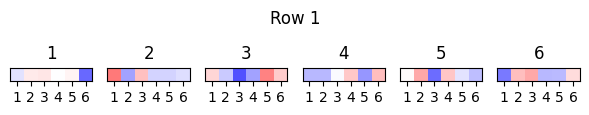

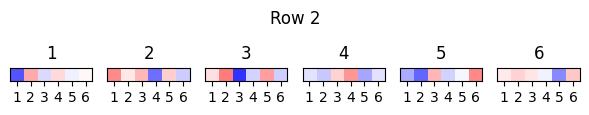

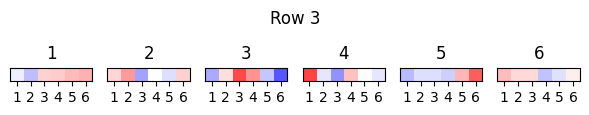

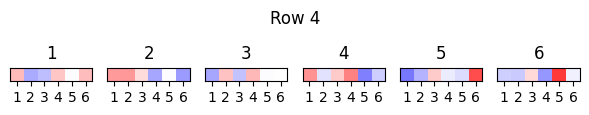

In [22]:
model.plot_connections()

model.plot_heatmap_feature(1, 0)
model.plot_heatmap_feature(1, 1)

for i in range(5): model.plot_heatmap_feature(0, i)